<a href="https://colab.research.google.com/github/JuliaClabunde/Trabalho---IA-/blob/main/Quest%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install ucimlrepo # Instalação da base de dados

In [5]:
#Importação de bibliotecas
import seaborn as sns  # biblioteca de visualização de dados baseada no matplotlib.
import matplotlib.pyplot as plt  # biblioteca para criar gráficos em Python.
from sklearn.model_selection import train_test_split #para dividir o dataset em treino, validação e teste
from sklearn.metrics import accuracy_score, precision_score, recall_score  # para calcular as métricas de avaliação
from sklearn.neighbors import KNeighborsClassifier  # para implementar o algoritmo KNN
import numpy as np  # biblioteca para cálculos numéricos em Python.
from ucimlrepo import fetch_ucirepo  # para acessar repositórios de dados da UCI
import time  # para medir o tempo de execução

# Configuração de estilo do Seaborn
sns.set(style='whitegrid')

In [22]:
# Carregando o dataset
htru2 = fetch_ucirepo(id=372)

# As características (features) do dataset são atribuídas à variável X
X = htru2.data.features
# A variável alvo (target) é atribuída a y, o `squeeze()` transforma y em uma série 1D, simplificando e preparando os dados
y = htru2.data.targets.squeeze()

In [28]:
# Função criada para classificação, aplicação e avaliação kNN, recebendo os dados e apresentando os 5 valores de k
def using_knn(X_train, X_val, X_test, y_train, y_val, y_test, k_values=[3, 5, 7, 9, 11]):
    # Listas para armazenar os dados de cada k
    accuracies = []
    precisions = []
    recalls = []

    # Variáveis para armazenar o melhor k
    best_k = None
    best_accuracy = 0

    # Loop para rodar essa parte do código para os 5 valores de k
    for k in k_values:

        start_time = time.time() # Inicializa o tempo
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Estabelece o número k e a métrica euclidiana para o classificador
        knn.fit(X_train, y_train) # Treina o modelo
        execution_time = time.time() - start_time # Calcula o tempo de execução

        # Fazendo previsões no conjunto de validação
        y_val_pred = knn.predict(X_val)

        # Calculando as métricas de avaliação no conjunto de validação
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        accuracy = accuracy_score(y_val, y_val_pred)

        # Encontrando e armazenando o melhor valor de k com base na acurácia
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

        # Armazenando os dados de cada k
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

        # Imprimindo os resultados de acurácia, precisão, recall, tempo de execução e número de protótipos para cada k
        print(f"\nResultados para k = {k}:")
        print(f"  Acurácia: {accuracy:.4f}")
        print(f"  Precisão: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  Tempo de Execução: {execution_time:.4f} segundos")
        print(f"  Número de Protótipos Usados: {len(X_train)}")
        print(f" ." *30)

    # Acurácia, recall e precisão média após executar o treinamento
    print(f"Resultados Médios após os 5 valores de k:")
    print(f"Acurácia Média: {np.mean(accuracies):.4f}")
    print(f"Precisão Média: {np.mean(precisions):.4f}")
    print(f"Recall Médio: {np.mean(recalls):.4f}")

    # Treina o modelo final usando o melhor k encontrado e avalia no conjunto de teste
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn_best.fit(X_train, y_train)
    y_test_pred = knn_best.predict(X_test)

    # Calcula e exibe as métricas finais no conjunto de teste
    print("-" * 30)
    print(f"Melhor k encontrado com base na acurácia: {best_k}")
    print("Resultados no conjunto de teste final:")
    print(f"  Acurácia: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"  Precisão: {precision_score(y_test, y_test_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"  Número de Protótipos Usados: {len(X_test)}")
    print("-" * 30)

    # Geração dos gráficos para visualizar as métricas em função de k
    plt.figure(figsize=(14, 6))

    # Gráfico da Acurácia
    plt.subplot(1, 3, 1)
    sns.lineplot(x=k_values, y=accuracies, marker='o', color='red')
    plt.axhline(y=np.mean(accuracies), color='orange', linestyle='--', label='Acurácia Média')
    plt.title('Acurácia por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Acurácia')
    plt.legend()

    # Gráfico da Precisão
    plt.subplot(1, 3, 2)
    sns.lineplot(x=k_values, y=precisions, marker='o', color='pink')
    plt.axhline(y=np.mean(precisions), color='orange', linestyle='--', label='Precisão Média')
    plt.title('Precisão por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Precisão')
    plt.legend()

    # Gráfico do Recall
    plt.subplot(1, 3, 3)
    sns.lineplot(x=k_values, y=recalls, marker='o', color='purple')
    plt.axhline(y=np.mean(recalls), color='orange', linestyle='--', label='Precisão Média')
    plt.title('Recall por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Recall')
    plt.legend()

    # Ajusta o layout e exibe os gráficos
    plt.tight_layout()
    plt.show()


Resultados para k = 3:
  Acurácia: 0.9703
  Precisão: 0.8838
  Recall: 0.7774
  Tempo de Execução: 0.0049 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 5:
  Acurácia: 0.9703
  Precisão: 0.8870
  Recall: 0.7737
  Tempo de Execução: 0.0047 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 7:
  Acurácia: 0.9713
  Precisão: 0.9087
  Recall: 0.7628
  Tempo de Execução: 0.0044 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 9:
  Acurácia: 0.9713
  Precisão: 0.9087
  Recall: 0.7628
  Tempo de Execução: 0.0047 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 11:
  Acurácia: 0.9703
  Precisão: 0.9039
  Recall: 0.7555
  Tempo de Execução: 0.0053 segundos
  Número de Protótipos Usados: 

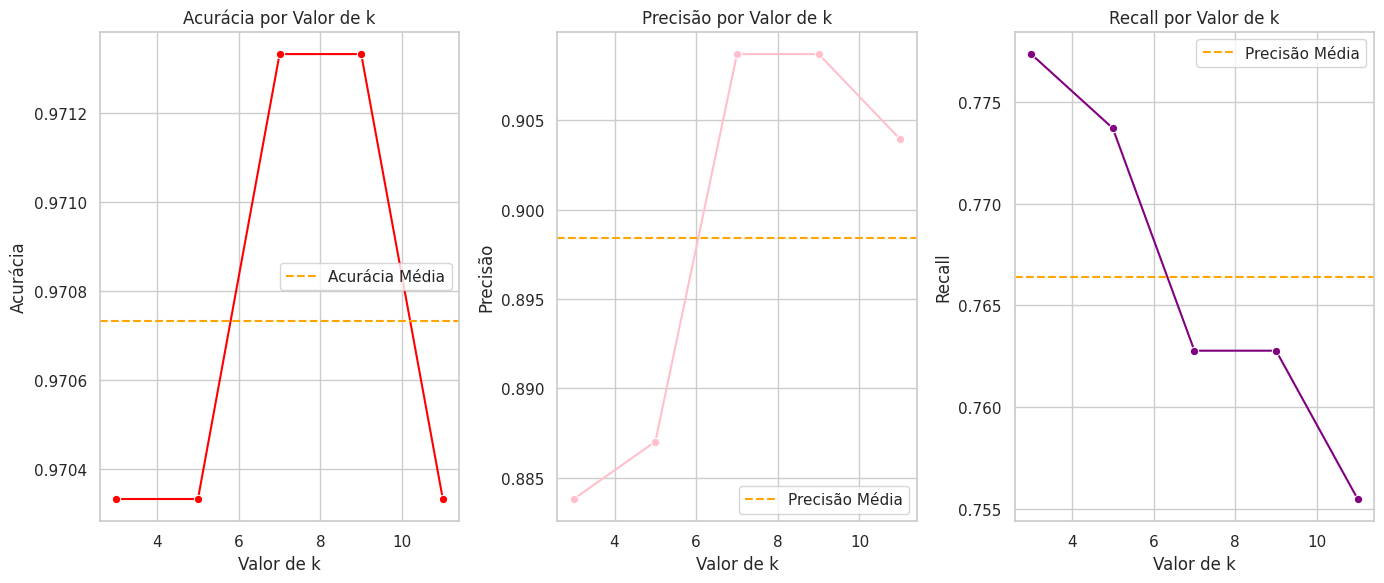


Resultados para k = 3:
  Acurácia: 0.9717
  Precisão: 0.8770
  Recall: 0.8036
  Tempo de Execução: 0.0101 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 5:
  Acurácia: 0.9760
  Precisão: 0.9212
  Recall: 0.8073
  Tempo de Execução: 0.0072 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 7:
  Acurácia: 0.9757
  Precisão: 0.9139
  Recall: 0.8109
  Tempo de Execução: 0.0071 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 9:
  Acurácia: 0.9753
  Precisão: 0.9170
  Recall: 0.8036
  Tempo de Execução: 0.0073 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 11:
  Acurácia: 0.9753
  Precisão: 0.9136
  Recall: 0.8073
  Tempo de Execução: 0.0074 segundos
  Número de Protótipos Usados: 

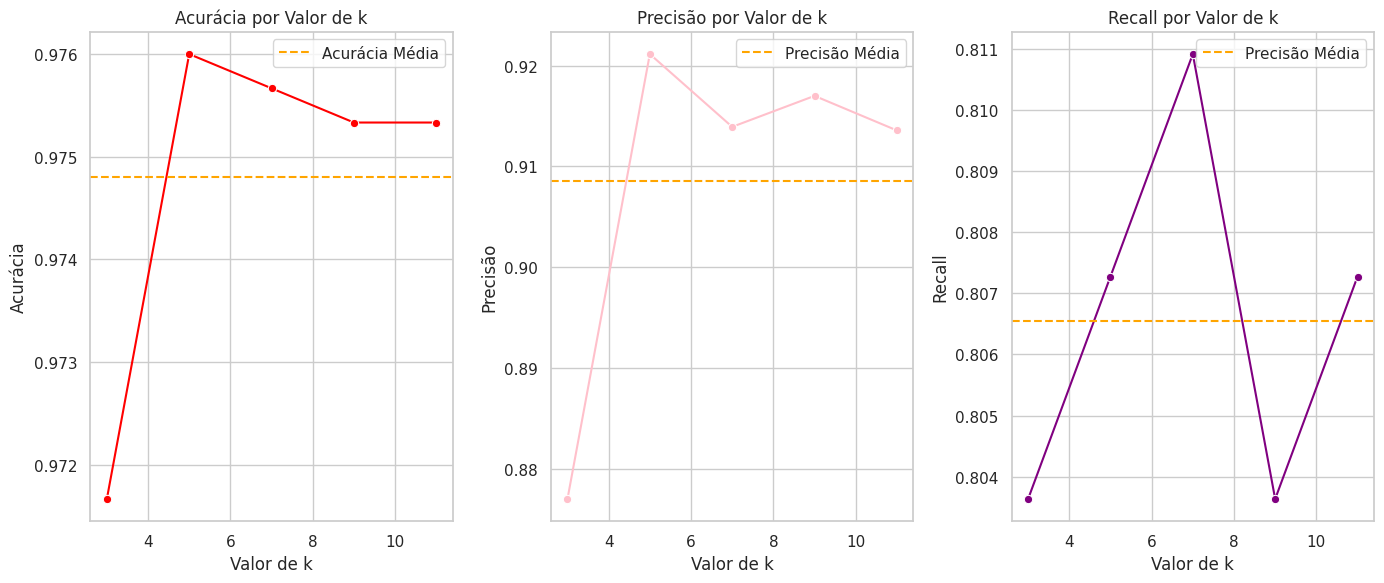


Resultados para k = 3:
  Acurácia: 0.9707
  Precisão: 0.8780
  Recall: 0.7883
  Tempo de Execução: 0.0076 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 5:
  Acurácia: 0.9723
  Precisão: 0.8963
  Recall: 0.7883
  Tempo de Execução: 0.0099 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 7:
  Acurácia: 0.9733
  Precisão: 0.9076
  Recall: 0.7883
  Tempo de Execução: 0.0101 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 9:
  Acurácia: 0.9737
  Precisão: 0.9079
  Recall: 0.7920
  Tempo de Execução: 0.0071 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 11:
  Acurácia: 0.9753
  Precisão: 0.9167
  Recall: 0.8029
  Tempo de Execução: 0.0069 segundos
  Número de Protótipos Usados: 

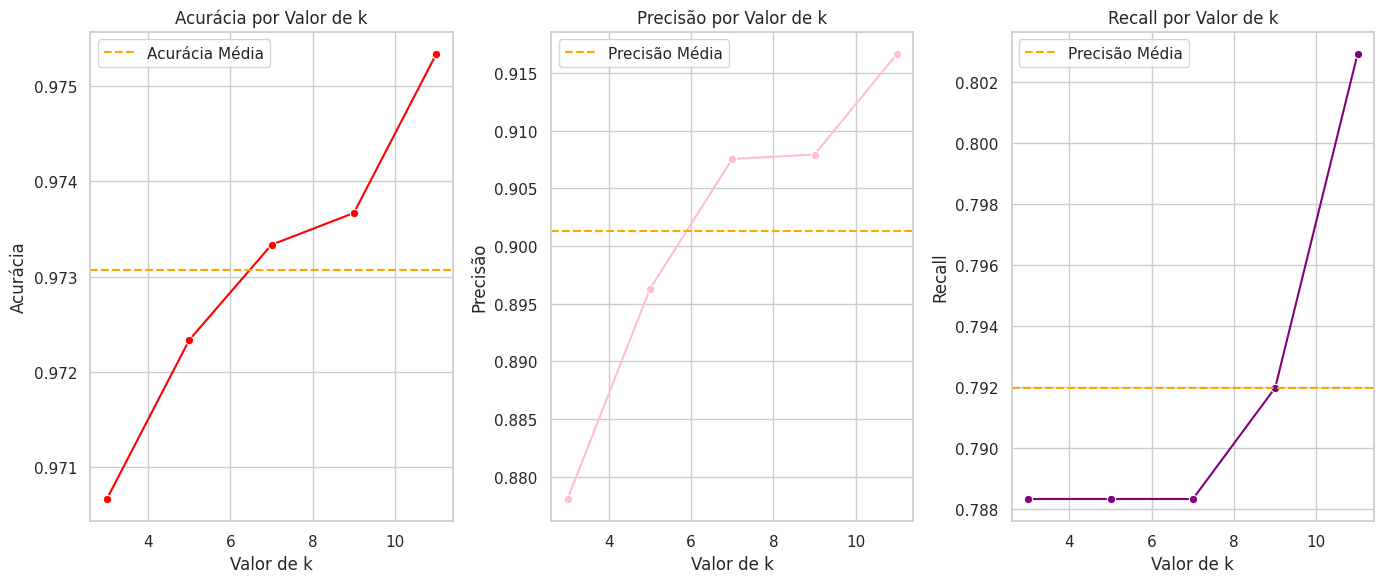


Resultados para k = 3:
  Acurácia: 0.9703
  Precisão: 0.9043
  Recall: 0.7564
  Tempo de Execução: 0.0199 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 5:
  Acurácia: 0.9710
  Precisão: 0.9196
  Recall: 0.7491
  Tempo de Execução: 0.0131 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 7:
  Acurácia: 0.9710
  Precisão: 0.9159
  Recall: 0.7527
  Tempo de Execução: 0.0103 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 9:
  Acurácia: 0.9710
  Precisão: 0.9196
  Recall: 0.7491
  Tempo de Execução: 0.0142 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 11:
  Acurácia: 0.9680
  Precisão: 0.9087
  Recall: 0.7236
  Tempo de Execução: 0.0106 segundos
  Número de Protótipos Usados: 

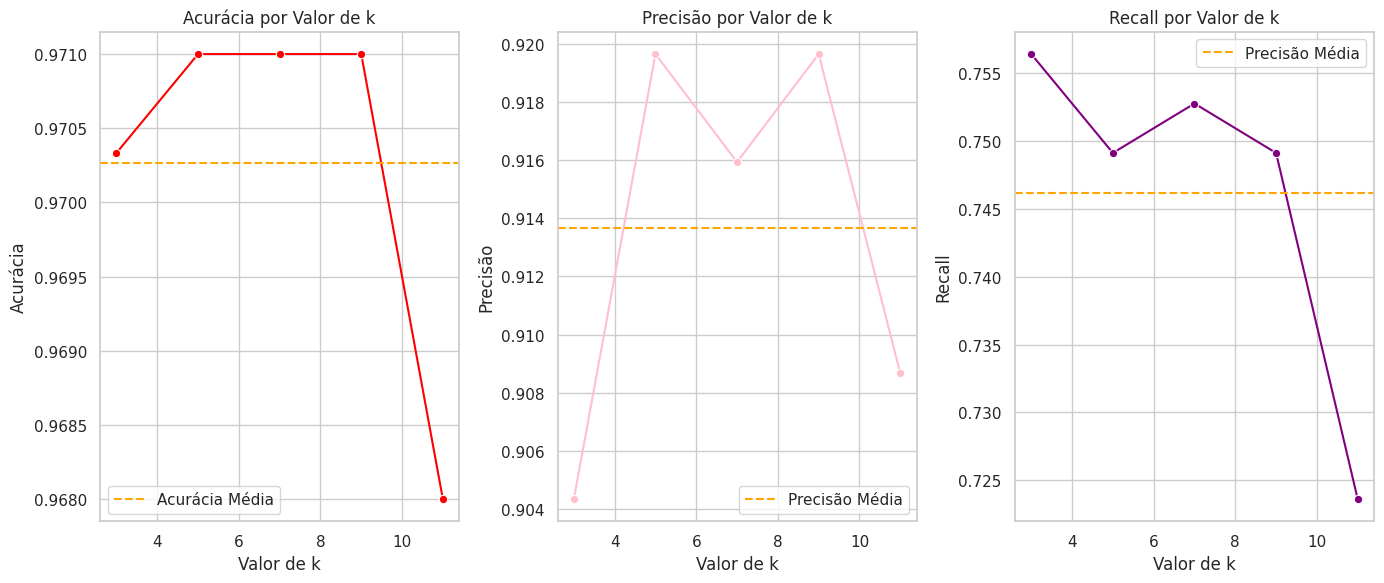


Resultados para k = 3:
  Acurácia: 0.9690
  Precisão: 0.8819
  Recall: 0.7628
  Tempo de Execução: 0.0069 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 5:
  Acurácia: 0.9683
  Precisão: 0.8745
  Recall: 0.7628
  Tempo de Execução: 0.0068 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 7:
  Acurácia: 0.9707
  Precisão: 0.8974
  Recall: 0.7664
  Tempo de Execução: 0.0068 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 9:
  Acurácia: 0.9707
  Precisão: 0.9009
  Recall: 0.7628
  Tempo de Execução: 0.0069 segundos
  Número de Protótipos Usados: 3000
 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Resultados para k = 11:
  Acurácia: 0.9710
  Precisão: 0.9013
  Recall: 0.7664
  Tempo de Execução: 0.0095 segundos
  Número de Protótipos Usados: 

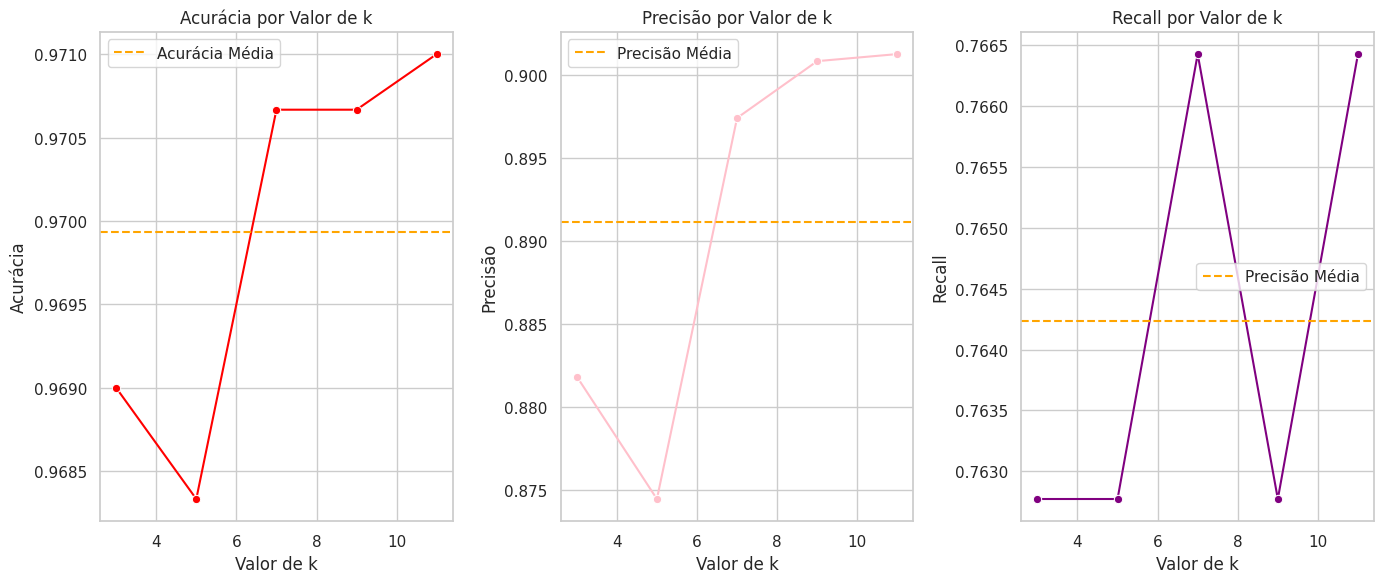

In [27]:
# Loop para cinco execuções
# Assim poderemos executar 5 vezes o treinamento e teste, chamando a função using_knn, de modo que para cada execução, use 6000 amostras de treino selecionadas aleatoriamente, conforme enunciado
for i in range(5):
    # Divisão do dataset em treino e teste, e em seguida o treino é dividido em treino e validação
    X_trainfull, X_test, y_trainfull, y_test = train_test_split(X, y, train_size=6000, stratify=y) # Para cada execução, as amostras de treino são selecionadas aleatoriamente
    X_train, X_val, y_train, y_val = train_test_split(X_trainfull, y_trainfull, test_size=0.5, stratify=y_trainfull) # Divisão para selecionar o melhor valor de k
    # Chamando a função
    using_knn(X_train, X_val, X_test, y_train, y_val, y_test)